In [153]:
#Regresyon Problemleri

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [154]:
veri=pd.read_csv("veri.csv")

In [155]:
#veriler temiz geldiği için ön işleme yapmadık
#eğitim test verilerini böldük

from sklearn.model_selection import train_test_split
y=veri['Satislar'].values
x=veri['Aylar'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 18)

In [156]:
#Standart Scaler
#özellik değerlerini ortalaması 0 ve standart sapması 1 olacak şekilde dönüştürür. Bu dönüşüm, özellikler arasındaki 
#ölçek farklarını giderir ve veri setindeki her bir özelliği aynı ölçeğe getirir.

#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#X_train = sc.fit_transform(x_train)
#X_test=sc.fit_transform(x_test)

In [157]:
#Lineer Regresyon

from sklearn.linear_model import LinearRegression
x_train = x_train[np.argsort(x_train)]
x_train = x_train.reshape(-1, 1)
y_train = y_train[np.argsort(y_train)]
y_train = y_train.reshape(-1, 1)
x_test = x_test[np.argsort(x_test)]
x_test = x_test.reshape(-1, 1)
y_test = y_test[np.argsort(y_test)]
y_test = y_test.reshape(-1, 1)
lr= LinearRegression()
model_lr = lr.fit(x_train, y_train)
lr.predict(x_test)

array([[12066.92322571],
       [13907.6578646 ],
       [16668.75982293],
       [22190.96373959],
       [26792.80033681],
       [27713.16765626],
       [28633.5349757 ],
       [43359.4120868 ],
       [45200.14672569],
       [63607.49311456]])

In [158]:
#Polynominal Regresyon
#doğrusal olmayan bir regresyondur 

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=4)
x_pr=pf.fit_transform(x_train)
lr_2=LinearRegression()
model_pr=lr_2.fit(x_pr,y_train)

#yukarıda yaptığımız şey temelde şu
#x yani featureslarımızı belli bir dereceli denkleme dönüştürüp ondan sonra normal linear regresyon modeline veriyoruz.Yani
#a+bx²cx³+dx⁴+... şeklinde giden bir denklemin x ve üssü kısımlarına Polynominal regresyon karar veriyor.
#a, b, c, d, gibi ifadelerin değerlerine de linear regresyon karar veriyor.
#PolynomialFeatures(degree=3) degree = 3 dediğimiz için 3. dereceden bir denklem ortaya çıkıyor.
#Tabiki dereceyi çok yükseltmememiz gereklidir.

In [159]:
#Basit matplotlib çizimleri

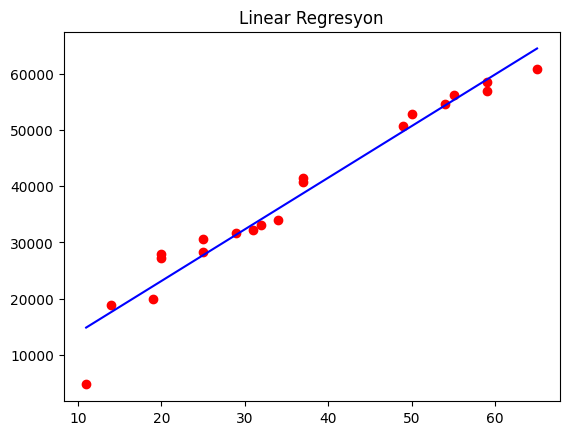

In [162]:
#Linear Regresyon

plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.title('Linear Regresyon')
plt.show()

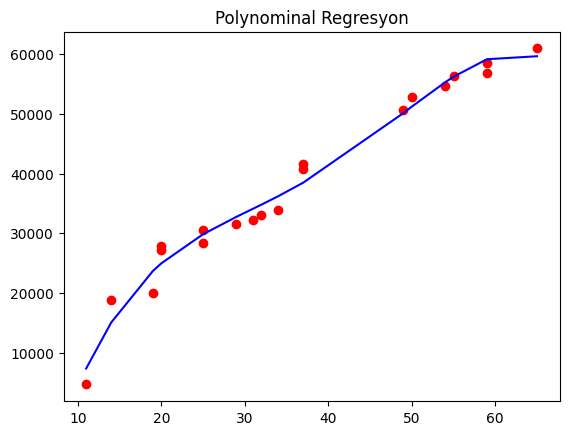

In [163]:
#Polynominal regreyson

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model_pr.predict(x_pr),color='blue')
plt.title('Polynominal Regresyon')
plt.show()

In [164]:
#Support Vector Regression
#Bu algoritma aslında sınıflandırma için kullanılan algoritmalardan biridir.
#Sınıflandırmada temel mantık yine veri kümesini ayıran bir doğru çizilir ancak bu doğru çizilirken komşulara en uzak olan
#margin aralığını bulup ona göre bir doğru çizmektir.
#Regresyon problemlerinde ise yine bir doğru çizilir ve margin aralığı bu sefer margin aralığı en küçük olan doğruyu bulmaya 
#çalışırız.

In [165]:
#Verileri ölçekleyelim
#istersek ölçekleme yapabiliriz...

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(x_train)
Y_train = sc.fit(y_train.reshape(-1, 1))
Y_train = sc.transform(y_train.reshape(-1, 1))

In [166]:
#Destek Vektör Regresyonu

from sklearn.svm import SVR
svr=SVR(kernel='rbf')
model_svr=svr.fit(X_train,Y_train.reshape(-1))

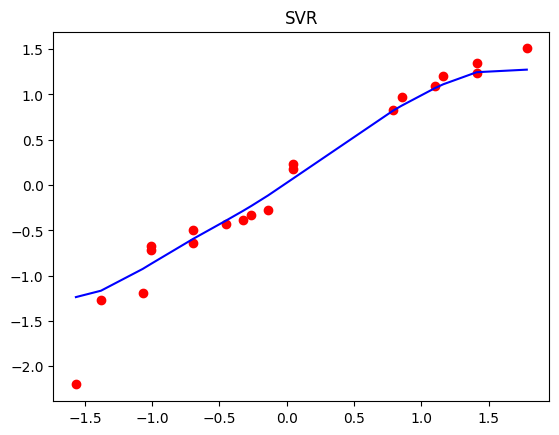

In [167]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,model_svr.predict(X_train),color='blue')
plt.title('SVR')
plt.show()

In [168]:
#Karar ağaçlari ile regresyon
#Bir entropi değerine göre veri belirli bir sayıda bölünür. Ardından bölümler arasında kalan verilerin ortalaması alınır.
#Yeni gelen veri hangi bölüme düşüyorsa o bölümün ortalaması yeni verinin değeri olarak tahmin edilir.
#Ancak aynı bölüme denk düşen tüm veriler de o bölümün ortalaması olarak tahmin edilir. 

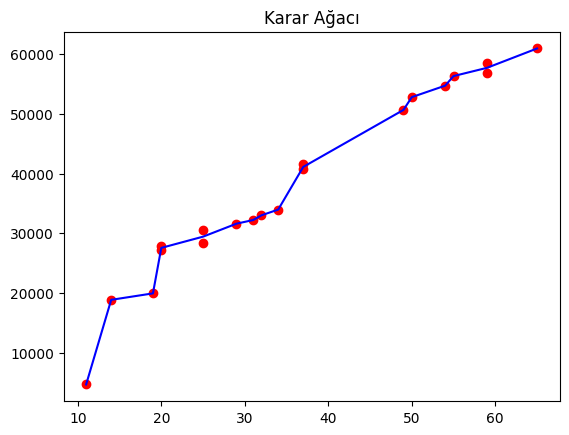

In [169]:
#Karar Ağacı

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
model_dt=dt.fit(x_train,y_train)

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model_dt.predict(x_train),color='blue')
plt.title('Karar Ağacı')
plt.show()

In [170]:
#Karar ağacı ile Regresyon problemlerinin en büyük sıkıntısı aynı bölüme denk düşen tüm veriler de 
#O bölümün ortalaması olarak tahmin etmesidir.

In [171]:
#Random Forest ile Regresyon
#Veriyi parçalara bölüyor ve bu parçaların her birini bir karar ağacına veriyor.
#Sınıflandırma yaparken her bir karar ağacı oy kullanıyor ve çoğunluğun aldığı değer tahmin değeri olarak kabul ediliyor.
#Regresyon problemlerinde ise karar ağaçlarının tahmin ettiği değerlerin ortalaması alınıyor.

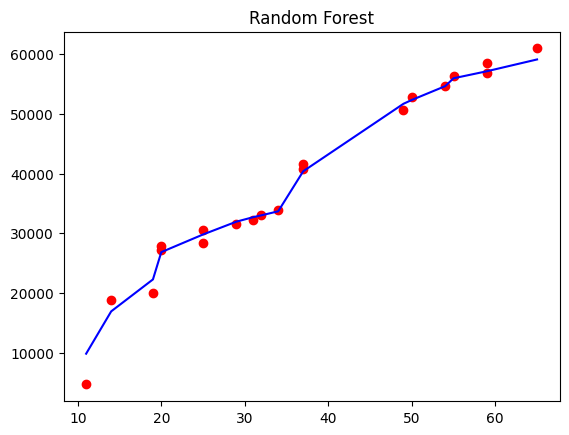

In [172]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=0)#n_estimators çizilecek ağaç sayısı
model_rf=rf.fit(x_train,y_train.ravel())

plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model_rf.predict(x_train),color='blue')
plt.title('Random Forest')
plt.show()

In [173]:
#R-Square 

#Bu bir hata ölçüsüdür. Temel olarak Ortalama Farkların Toplamı(OFT) ve Hata Kareleri Toplamı(HKT) bulunur.
#OHT verimizdeki değerlerin ortalamasından tahmin edilen değeri çıkarıp karesini alarak buluruz.
#OFT ise gerçek değer ile tahmin edilen değerin arasındaki farkın karesidir.
#R² = 1-(HKT)/(OHT) formülü ile bir değer elde ederiz.
#Bu değerin 0-1 aralığında olması beklenir.
#Bire ne kadar yakınsa o kadar başarılı diyebiliriz.

In [174]:
#Düzeltilmiş R-Square 

#R-Square yönteminde sisteme yeni bir özellik eklediğimizde bu özellik olumsuz ise değerimiz asla azalmaz.
#Çünkü çarpan sıfıra çok yakın veya sıfır olduğunda değerde bir değişiklik göstermez.Bu da R-Square değerinin azalmamasıdır.
#n = eleman sayısı ve p = özellik sayısı olduğunu varsayalım.
#Düzeltilmiş R² = 1-(1-R²)(n-1)/(n-p-1) olur.
#Bu da yeni bir özellik(p) eklediğimizde payda büyüyeceği için değer küçülür ve sistemi olumsuz etkiliyorsa değer de küçülür.

In [175]:
from sklearn.metrics import r2_score

print('Random forest R² skor')
print(r2_score(y_test,model_rf.predict(x_test)))

print('Karar Ağacı R² skor')
print(r2_score(y_test,model_dt.predict(x_test)))

print('SVR R² score')
print(r2_score(X_train,model_svr.predict(X_train)))

print('Polynominal Regresyon R² skor')
print(r2_score(y_test, model_pr.predict(pf.fit_transform(x_test))))

print('Lineer Regresyon R² skor')
print(r2_score(y_test,model_lr.predict(x_test)))

Random forest R² skor
0.8011447430137565
Karar Ağacı R² skor
0.6247052592654057
SVR R² score
0.9718166175594193
Polynominal Regresyon R² skor
0.42096665145730117
Lineer Regresyon R² skor
0.8613110480710998
